<a href="https://colab.research.google.com/github/HACP/GameOfLife/blob/main/GameOfLife_20210710_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
%matplotlib inline

import numpy as np
import pylab as plt
from IPython import display
import time

# Game Of Life Implementation

In [2]:
#@title Board Size (Select Game Parameters)
board_size = 20 #@param {type:"integer"}
number_of_gliders = 2 #@param {type:"integer"}
number_of_unbounded = 1 #@param {type:"integer"}

In [3]:
#@title
# Configurations
glider = [[1, 0, 0],
          [0, 1, 1],
          [1, 1, 0]]

unbounded = [[1, 1, 1, 0, 1],
             [1, 0, 0, 0, 0],
             [0, 0, 0, 1, 1],
             [0, 1, 1, 0, 1],
             [1, 0, 1, 0, 1]]

In [4]:
#@title
m = np.zeros((board_size,board_size))
#m = np.random.choice([0,1],size = (board_size,board_size))
for _ in range(number_of_gliders):
  (x,y) = np.random.randint(0,board_size,size=2)
  for ii in range(np.array(glider).shape[0]):
    for jj in range(np.array(glider).shape[1]):
      m[(x+ii)%board_size][(y+jj)%board_size] = glider[ii][jj]

for _ in range(number_of_unbounded):
  (x,y) = np.random.randint(0,board_size,size=2)
  for ii in range(np.array(unbounded).shape[0]):
    for jj in range(np.array(unbounded).shape[1]):
      m[(x+ii)%board_size][(y+jj)%board_size] = unbounded[ii][jj]

height, width = m.shape

In [5]:
#@title
def get_score_neighbors(conf,i, j):
    N = conf.shape[0]
    return int((conf[(i+0)%N][(j-1)%N] +0*conf[(i+0)%N][(j+0)%N] + conf[(i+0)%N][(j+1)%N] + 
                conf[(i+1)%N][(j-1)%N] +  conf[(i+1)%N][(j+0)%N] + conf[(i+1)%N][(j+1)%N] + 
                conf[(i-1)%N][(j-1)%N] +  conf[(i-1)%N][(j+0)%N] + conf[(i-1)%N][(j+1)%N] ))
    
def update_conf(conf):
    conf_next = conf.copy()
    for jj in range(width):
        for ii in range(height):
            score = get_score_neighbors(conf, ii,jj)
            
            if conf[ii][jj] == 1.:
                if (score < 2) or (score > 3):
                    conf_next[ii][jj] = 0.
            else:
                if score == 3.:
                    conf_next[ii][jj] = 1.
            
    return(conf_next,sum(sum(abs(conf_next - conf))))

def run_iteration():
  m_next = m.copy()
  delta = 1
  fig = plt.figure(figsize=(8,8))
  for count in range(100):
    print(count)
    if sum(sum(m_next))>0 and delta > 0:
      plt.imshow(m_next)
      #plt.title(str(count))
      plt.axis('off')
      m_next, delta = update_conf(m_next)
      display.clear_output(wait=True)
      display.display(plt.gcf())
      time.sleep(0.1)

  display.clear_output(wait=True)
  plt.imshow(m_next)
  plt.axis('off')
  plt.show()


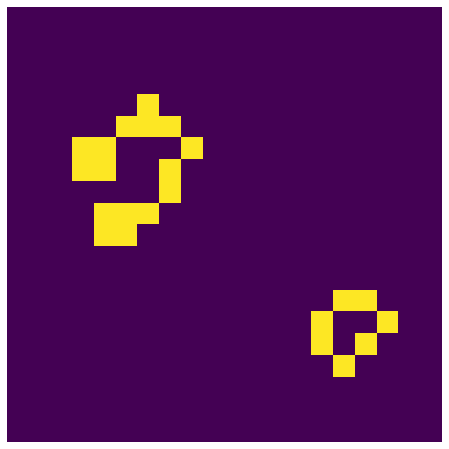

In [6]:
run_iteration()